# 1) Data Preprocessing

In [47]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
img = cv2.imread("images_dataset/lionel_messi/_111066400_messi.jpg")
img.shape

(576, 1024, 3)

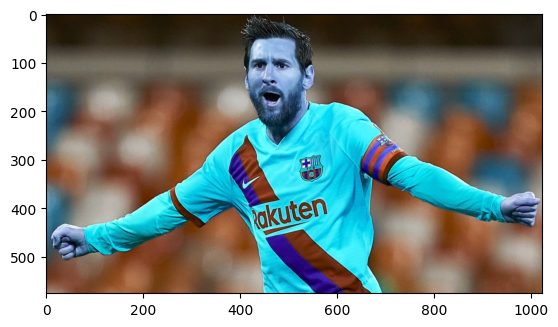

In [49]:
plt.imshow(img)

In [50]:
face_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[394,  54, 138, 138]])

In [51]:
(x,y,w,h) = faces[0]
x,y,w,h

(394, 54, 138, 138)

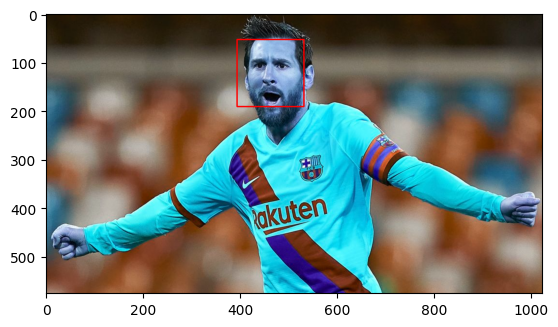

In [52]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

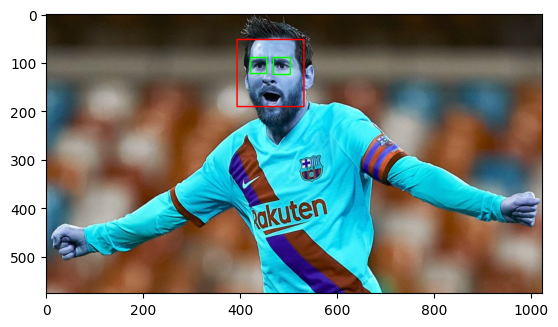

In [53]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

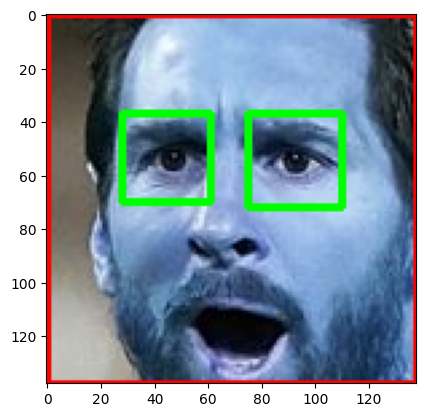

In [54]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [55]:
# function to detect face and 2-eyes in the image
def get_cropped_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


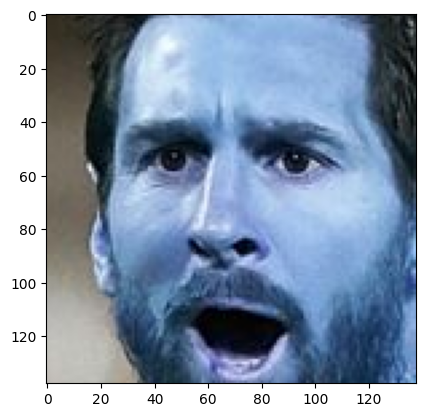

In [90]:
cropped_image = get_cropped_eyes("images_dataset\lionel_messi\_111066400_messi.jpg")
plt.imshow(cropped_image)

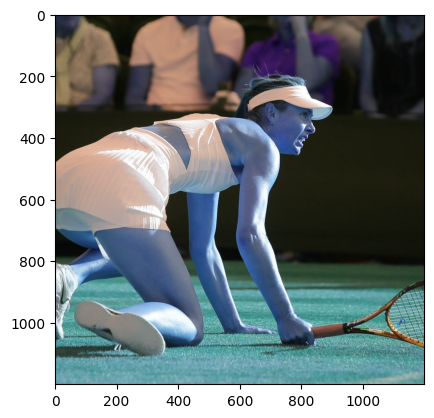

In [58]:
org_img = cv2.imread("images_dataset/maria_sharapova/2900.jpg")
plt.imshow(org_img)

In [91]:
not_cropped_image = get_cropped_eyes("images_dataset/maria_sharapova/2900.jpg")
not_cropped_image
# no values returned because both eyes are not visible in the image

In [69]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [70]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [97]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [98]:
cropped_images_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_images_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


# 2) Feature Engineering

In [138]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255

    coeffs = pywt.wavedec2(imArray, mode, level = level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

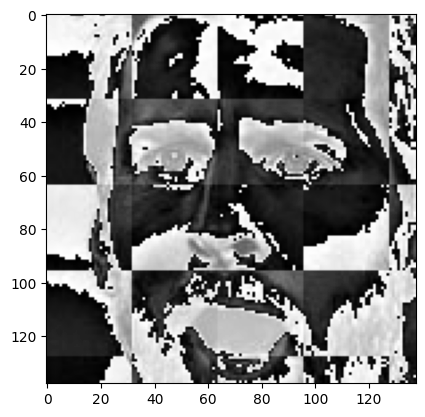

In [139]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [140]:
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel_messi16.png',
 

In [141]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [142]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combine_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combine_img)
        y.append(class_dict[celebrity_name])

In [143]:
len(x[0])

4096

In [144]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(169, 4096)

# 3) Model Training

In [145]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [146]:
X = x
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8372093023255814

In [147]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.83      1.00      0.91        10
           2       0.71      0.71      0.71         7
           3       0.83      0.71      0.77         7
           4       0.92      1.00      0.96        12

    accuracy                           0.84        43
   macro avg       0.82      0.80      0.80        43
weighted avg       0.83      0.84      0.83        43



In [148]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [149]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [150]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.800923,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.674769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.809231,{'logisticregression__C': 1}


In [151]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [152]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9069767441860465

In [153]:
best_estimators['svm'].score(X_test,y_test)

0.8604651162790697

In [154]:
best_estimators['random_forest'].score(X_test,y_test)

0.6744186046511628

In [155]:
best_clf = best_estimators['logistic_regression']

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  1,  6,  0,  0],
       [ 0,  1,  1,  5,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

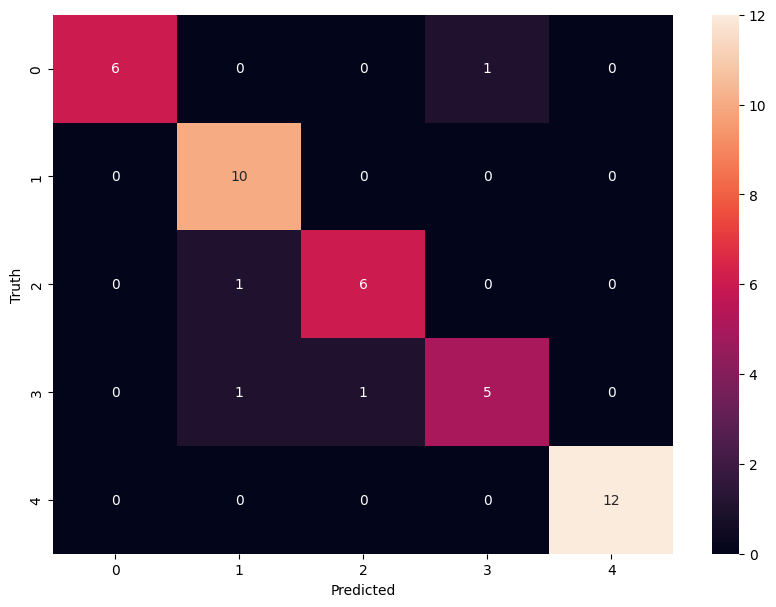

In [157]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [158]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [159]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [160]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))